In [127]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

In [42]:
df = pd.read_excel('../data/lab10/Online Retail.xlsx')

df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [45]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [46]:
for col in df.columns:
  print(df[col].isna().value_counts())

InvoiceNo
False    541909
Name: count, dtype: int64
StockCode
False    541909
Name: count, dtype: int64
Description
False    540455
True       1454
Name: count, dtype: int64
Quantity
False    541909
Name: count, dtype: int64
InvoiceDate
False    541909
Name: count, dtype: int64
UnitPrice
False    541909
Name: count, dtype: int64
CustomerID
False    406829
True     135080
Name: count, dtype: int64
Country
False    541909
Name: count, dtype: int64


In [48]:
df.dropna(subset=['CustomerID', 'Description'], inplace=True)
df = df[(df['UnitPrice'] > 0) & (df['Quantity'] > 0)]
df['TotalPrice'] = df['UnitPrice'] * df['Quantity']

C:\Users\Dell\AppData\Local\Temp\ipykernel_5244\1162550176.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalPrice'] = df['UnitPrice'] * df['Quantity']


In [51]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  float64       
 7   Country      392692 non-null  object        
 8   TotalPrice   392692 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.0+ MB


C:\Users\Dell\AppData\Local\Temp\ipykernel_5244\1641905301.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


Group by based on customer id to extract further stats usign RFM analysis:
- Recency: Days since the customer's last purchase relative to the last invoice time
- Frequency: Number of transactions the customer has made
- Monetary: Total spending of the customer
- TotalItems: Total items purchased by the customer
- UnqiueProducts: Number of different products bought by the customer
- Average: Average items per transaction

In [55]:
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

rfm = df.groupby('CustomerID').agg({
  'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
  'InvoiceNo': 'count',
  'TotalPrice': 'sum',
  'Quantity': 'sum',
  'StockCode': 'nunique'
})

rfm.columns = ['Recency', 'Frequency', 'Monetary', 'TotalItems', 'UniqueProducts']
rfm['Average'] = rfm['TotalItems'] / rfm['Frequency']

In [56]:
rfm.head()

,Recency,Frequency,Monetary,TotalItems,UniqueProducts,Average
CustomerID,,,,,,
12346.0,326,1,77183.60,74215,1,74215.000000
12347.0,2,182,4310.00,2458,103,13.505495
12348.0,75,31,1797.24,2341,22,75.516129
12349.0,19,73,1757.55,631,73,8.643836
12350.0,310,17,334.40,197,17,11.588235


In [57]:
rfm.describe()

,Recency,Frequency,Monetary,TotalItems,UniqueProducts,Average
count,4338.000000,4338.000000,4338.000000,4338.000000,4338.000000,4338.000000
mean,92.536422,90.523744,2048.688081,1187.644537,61.501153,45.080599
std,100.014169,225.506968,8985.230220,5043.619654,85.366768,1203.437983
min,1.000000,1.000000,3.750000,1.000000,1.000000,1.000000
25%,18.000000,17.000000,306.482500,159.000000,16.000000,6.042120
50%,51.000000,41.000000,668.570000,378.000000,35.000000,10.000000
75%,142.000000,98.000000,1660.597500,989.750000,77.000000,14.666667
max,374.000000,7676.000000,280206.020000,196915.000000,1787.000000,74215.000000


In [60]:
# apply log1p to stabilize extremely small values
rfm_log = np.log1p(rfm)

ss = StandardScaler()
rfm_scaled = ss.fit_transform(rfm_log)

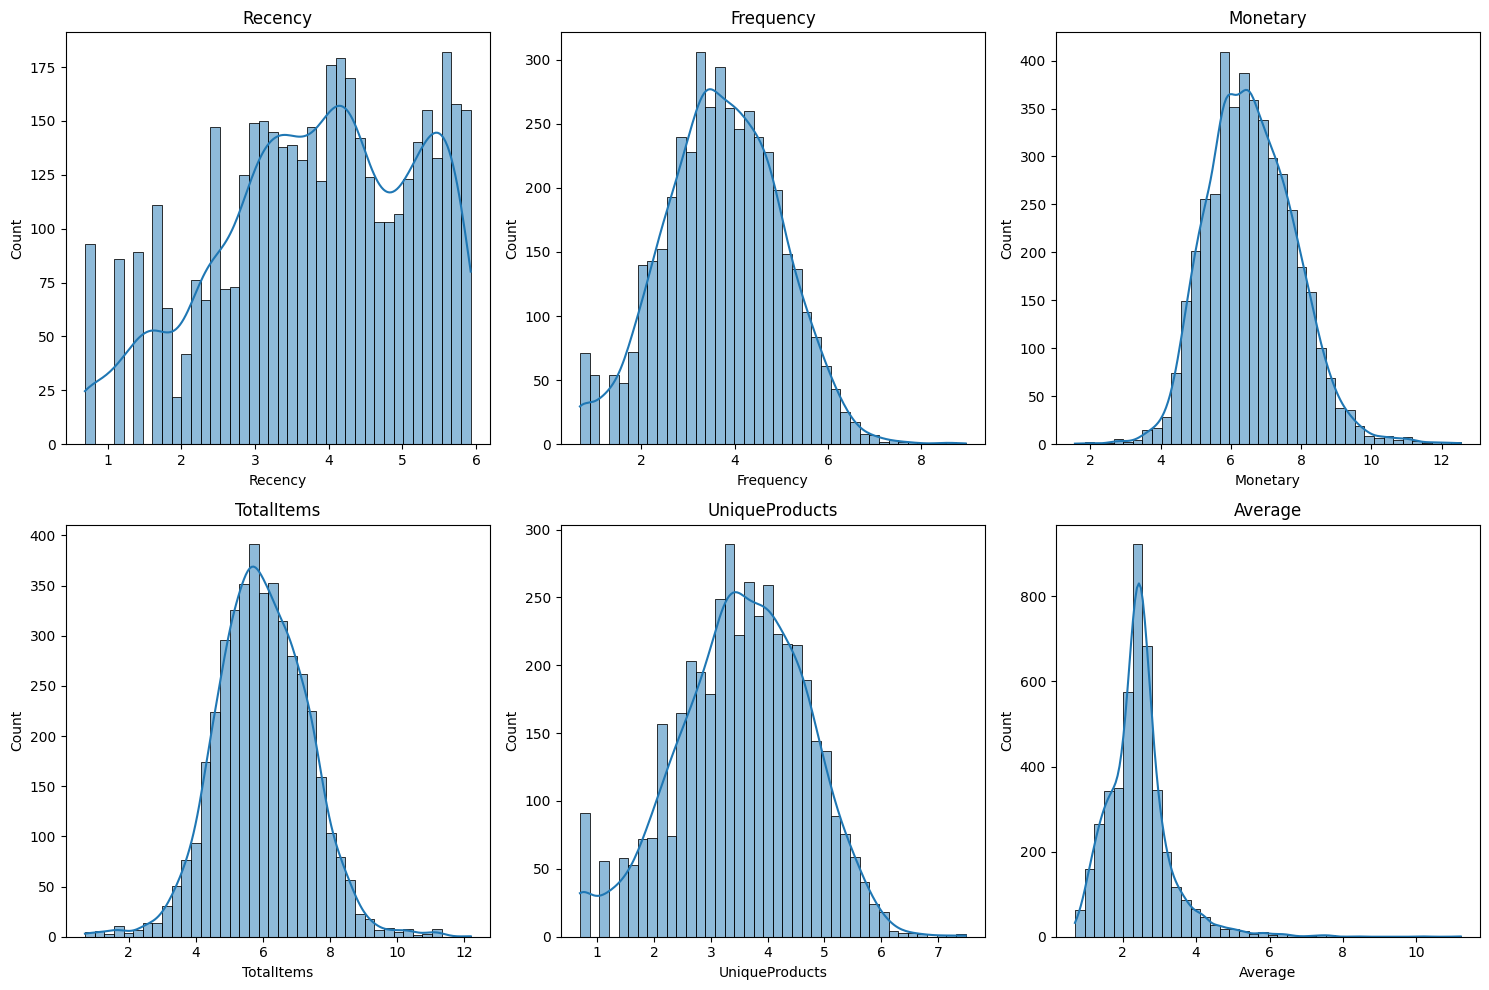

In [62]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(rfm_log.columns, 1):
  plt.subplot(2, 3, i)
  sns.histplot(rfm_log[col], kde=True, bins=40)
  plt.title(f"{col}")

plt.tight_layout()
plt.show()

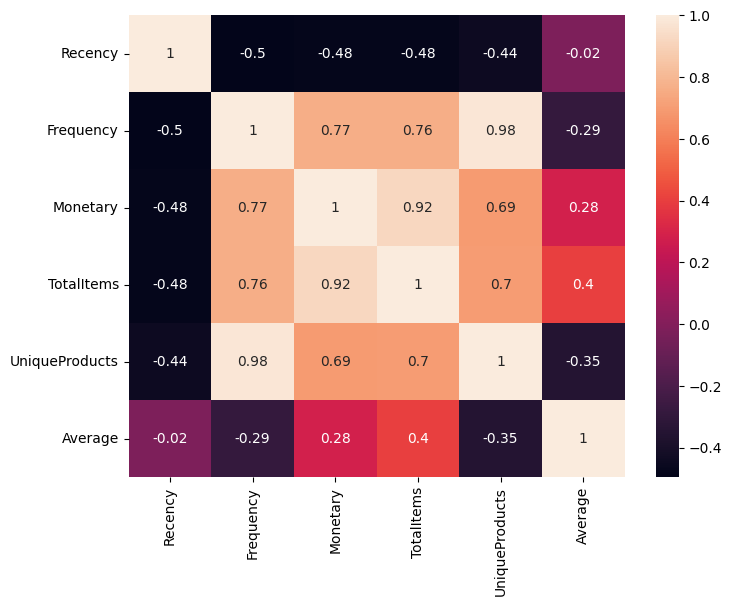

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(rfm_log.corr(), annot=True)
plt.show()

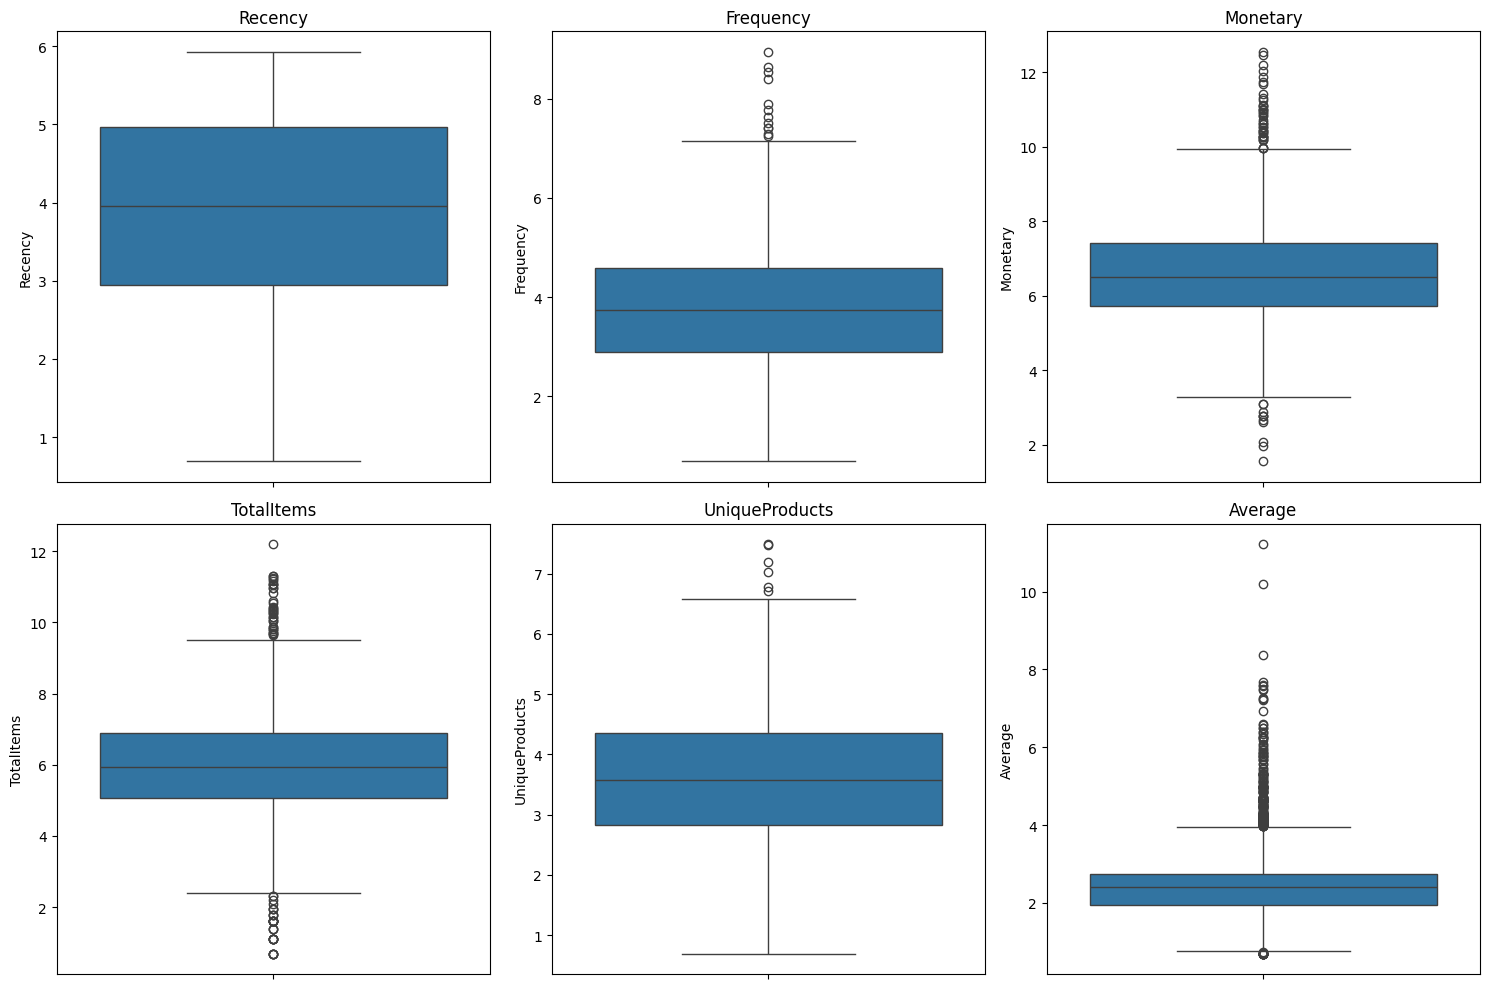

In [65]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(rfm_log.columns, 1):
  plt.subplot(2, 3, i)
  sns.boxplot(rfm_log[col])
  plt.title(f"{col}")

plt.tight_layout()
plt.show()

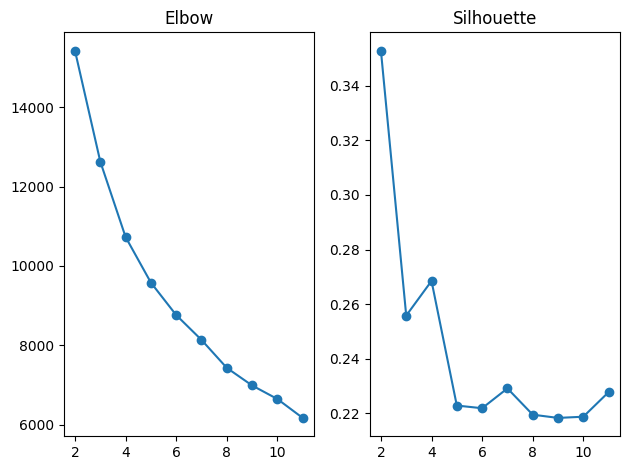

In [76]:
wcss, sil = [], []
for i in range(2, 12):
  km = KMeans(i, random_state=42)
  y_res = km.fit_predict(rfm_scaled)
  wcss.append(km.inertia_)
  sil.append(silhouette_score(rfm_scaled, y_res))

plt.subplot(1, 2, 1)
plt.plot(range(2, 12), wcss, marker='o')
plt.title("Elbow")

plt.subplot(1, 2, 2)
plt.plot(range(2, 12), sil, marker='o')
plt.title("Silhouette")

plt.tight_layout()
plt.show()

In [156]:
# cluster 2 yileds the max silhouette score
best_cluster = 2
print("Best cluster:", best_cluster)
print("Silhouette score:", np.round(sil[best_cluster - 2], 4))


Best cluster: 2
Silhouette score: 0.3528


Explained variance ratio: [0.62420524 0.24330677]
Total variance explained: 0.8675120048101312


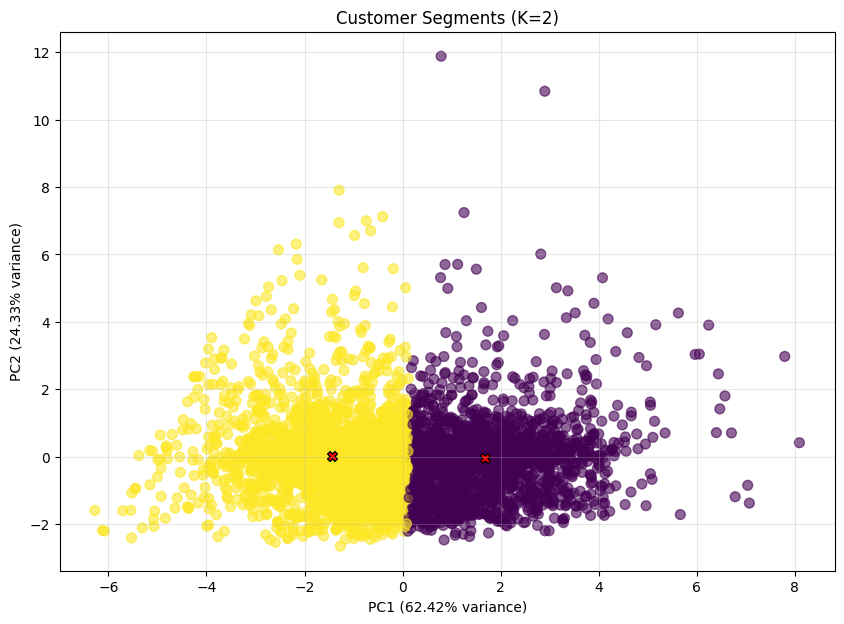

In [167]:
from sklearn.decomposition import PCA

km_final = KMeans(best_cluster, n_init=10, random_state=42)
clusters = km_final.fit_predict(rfm_scaled)

pca = PCA(n_components=2)
rfm_pca = pca.fit_transform(rfm_scaled).T

print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Total variance explained:", sum(pca.explained_variance_ratio_))

plt.figure(figsize=(10, 7))

# place the transformed points
scatter = plt.scatter(
  rfm_pca[0],
  rfm_pca[1],
  c=clusters, cmap='viridis', s=50, alpha=0.6
)

# place the centroids as X
plt.scatter(
  pca.transform(km_final.cluster_centers_).T[0],
  pca.transform(km_final.cluster_centers_).T[1],
  c='red', marker='X', s=50, ec='black'
)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.title(f'Customer Segments (K={best_cluster})')
plt.grid(alpha=0.3)
plt.show()


In [154]:
rfm['Cluster'] = clusters

cluster_summary = rfm.groupby('Cluster')[rfm.columns].agg(['mean', 'median', 'count'])
cluster_summary

Recency                Frequency                  Monetary  \
               mean median count        mean median count         mean   
Cluster                                                                  
0         39.044411   22.0  2004  170.293912  106.0  2004  3925.332721   
1        138.465296  106.0  2334   22.032134   19.0  2334   437.378801   

                          TotalItems               UniqueProducts         \
           median count         mean  median count           mean median   
Cluster                                                                    
0        1742.185  2004  2286.281936  1024.5  2004     109.140220   82.0   
1         322.245  2334   244.341474   173.0  2334      20.597686   18.0   

                 Average                  Cluster               
        count       mean     median count    mean median count  
Cluster                                                         
0        2004  67.730197  10.227582  2004     0.0    0.0  2004  
1        2334  25.633387   9.728736  2334     1.0    1.0  2334

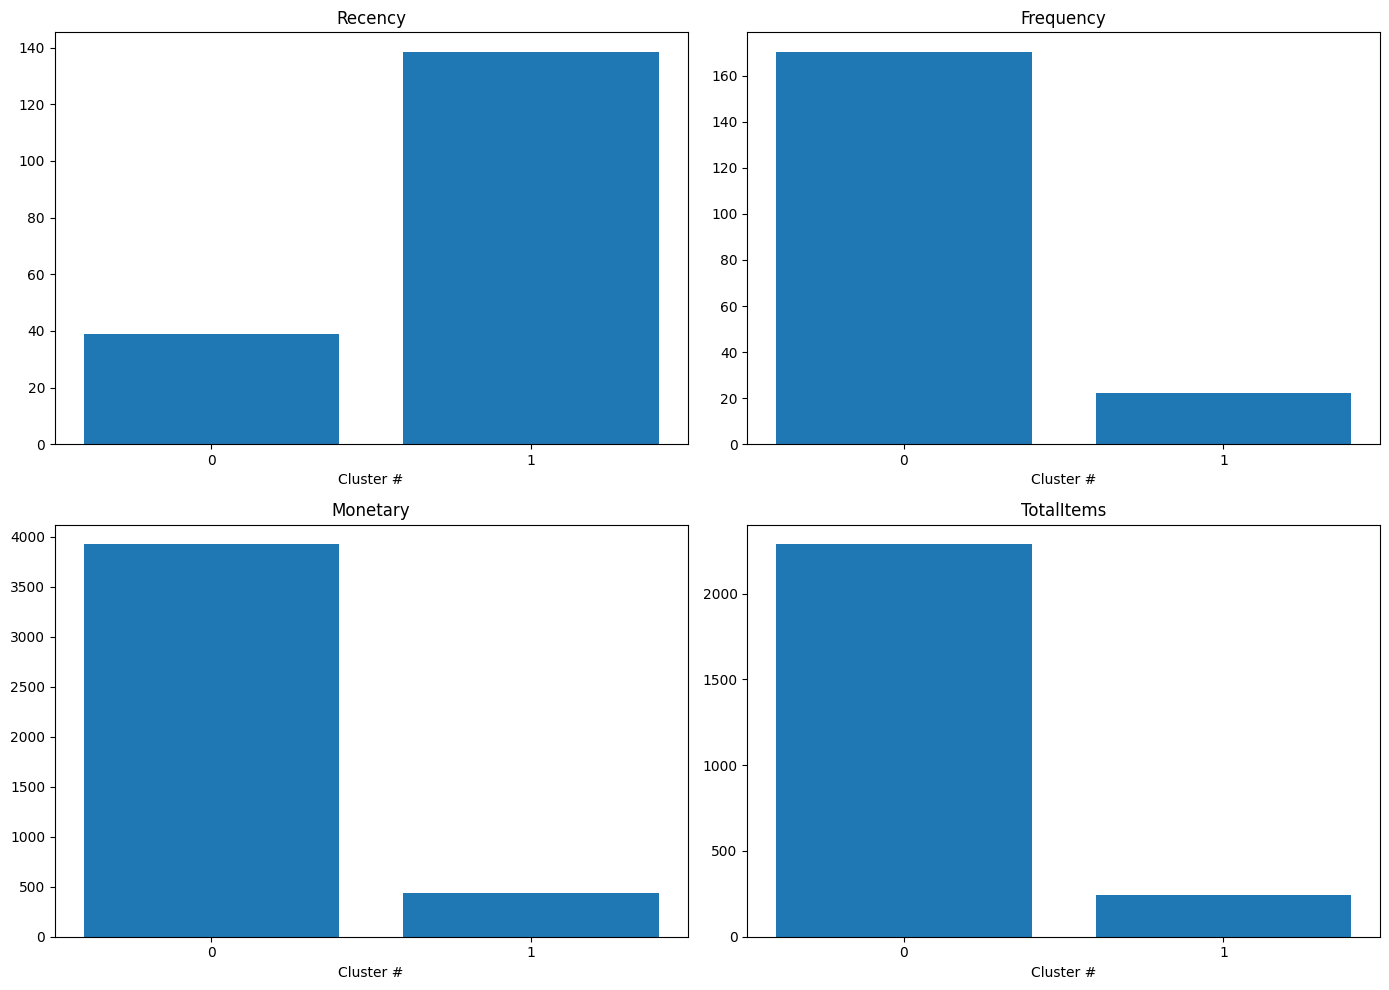

In [155]:
plt.figure(figsize=(14, 10))
metrics = ['Recency', 'Frequency', 'Monetary', 'TotalItems']

for i, metric in enumerate(metrics):
  plt.subplot(2, 2, i+1)
  cluster_means = rfm.groupby('Cluster')[metric].mean()
  
  plt.bar(range(best_cluster), cluster_means.values)
  plt.xlabel('Cluster #')
  plt.title(f'{metric}')
  plt.xticks(range(best_cluster))

plt.tight_layout()
plt.show()


#### Recency
Shows how recently customers made purchases. Cluster 0 has lower recency (more recent), Cluster 1 has higher recency (inactive for longer).

#### Frequency
Shows how often customers make purchases. Cluster 0 has more transactions, Cluster 1 has fewer transactions.

#### Monetary
Shows total spending. Cluster 0 spent more overall, Cluster 1 spent less.

#### TotalItems
Shows quantity of items purchased. Cluster 0 bought more items, Cluster 1 bought fewer items.

#### Conclusion
Cluster 0 represents high-value, active customers. Cluster 1 represents low-value, inactive customers.
